# WITH PANDAS AND MATPLOTLIB

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS

1. Number of people by gender
1. Kill weapon
1. Age of killed people
1. Race of killed people
1. Killed People According to Races (Pie Chart)
1. Most common 15 Name or Surname of killed people

<br>

read data

if didn't work you can use this parameters: encoding="windows-1252"

In [2]:
df = pd.read_csv("PoliceKillingsUS.csv", encoding="windows-1252")

## 1: Plot number of people by gender

In [3]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


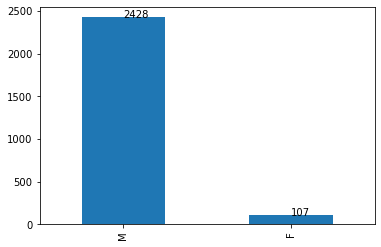

In [31]:
y = df.gender.value_counts().values
x = df.gender.value_counts().index
df.gender.value_counts().plot.bar()

for index, value in enumerate(y):
    plt.text(index, value, str(value))

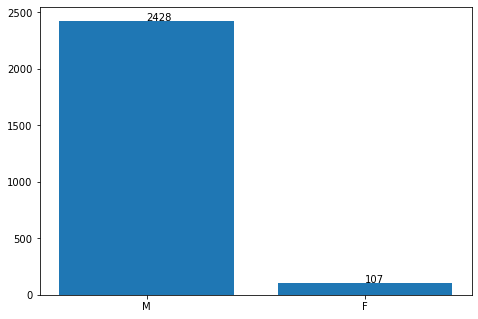

In [39]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1,])
ax.bar(x,y)

for index, value in enumerate(y):
    plt.text(index, value, str(value))

## 2: Plot 7 most common kill weapons

In [40]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [42]:
df.armed.value_counts().head(7)

gun               1398
knife              373
vehicle            177
unarmed            171
undetermined       117
toy weapon         104
unknown weapon      18
Name: armed, dtype: int64

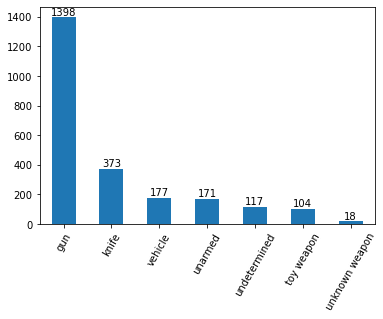

In [85]:
a = df.armed.value_counts()[:7].values
b = df.armed.value_counts()[:7].index

plt.figure(figsize=(6,4))
df.armed.value_counts()[:7].plot.bar()
plt.xticks(rotation=60)


for index, value in enumerate(a):
    plt.text(index, value, str(value), ha="center", va="bottom")


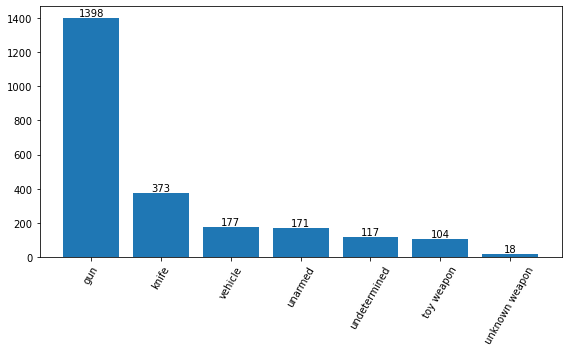

In [84]:
fig, ax = plt.subplots(figsize=(8,5))
ax.bar(b,a)
plt.xticks(rotation=60)
fig.tight_layout()

for index, value in enumerate(a):
    plt.text(index,value, str(value), ha="center", va="bottom")


## 3: Plot number of age of killed people under two groups : Under 25 and Above 25

In [89]:
old = df.age.dropna() <=25

In [91]:
old.isnull().sum()

0

In [92]:
old= old.dropna()
old

0       False
1       False
2        True
3       False
4       False
        ...  
2529    False
2530    False
2532    False
2533    False
2534    False
Name: age, Length: 2458, dtype: bool

In [93]:
old = old.replace({True:"below25", False:"above25"})


In [94]:
old = pd.DataFrame(old)

In [95]:
old.value_counts()

age    
above25    1905
below25     553
dtype: int64

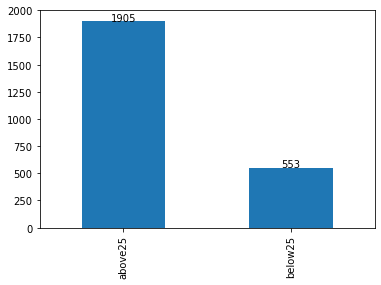

In [99]:
y = old.value_counts()
plt.figure()
old.age.value_counts().plot.bar()

for index, value in enumerate(y):
    plt.text(index, value, str(value), ha="center")


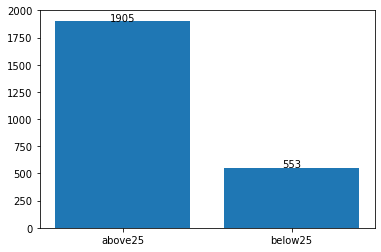

In [100]:
x = old.age.value_counts().index
y = old.age.value_counts().values

plt.bar(x,y)

for index, value in enumerate(y):
    plt.text(index, value, str(value), ha="center")

## 4: Plot number of killed poeple by race

In [101]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [102]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Text(0.5, 1.0, 'Race of killed people')

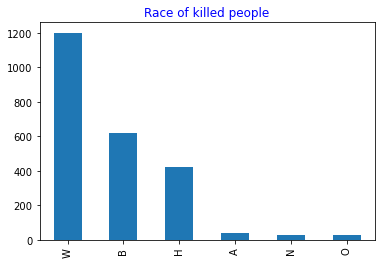

In [104]:
df.race.value_counts().plot.bar();
plt.title("Race of killed people", color="Blue")

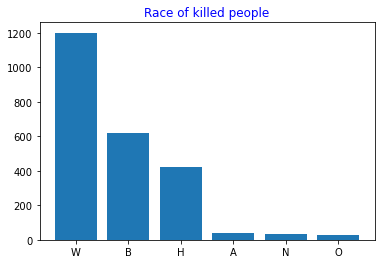

In [110]:
fig, ax = plt.subplots()
ax.bar(df.race.value_counts().index, df.race.value_counts().values)
ax.set_title("Race of killed people", color="blue");


## 5: Killed People According to Races (Pie Chart)

In [111]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [133]:
df.race.value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [118]:
df.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [120]:
df.dropna(inplace=True)

In [121]:
df.shape

(2254, 14)

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart (You can use Matplotlib)**

In [122]:
df.race.value_counts()

W    1168
B     592
H     401
A      36
N      29
O      28
Name: race, dtype: int64

In [127]:
df.race.value_counts().index

Index(['W', 'B', 'H', 'A', 'N', 'O'], dtype='object')

In [134]:
df.race.value_counts().values

array([1168,  592,  401,   36,   29,   28], dtype=int64)

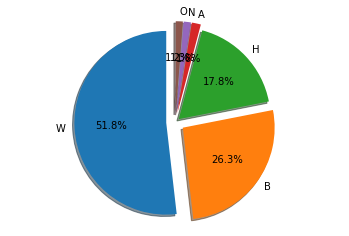

In [148]:
# matplotlib

#plt.pie(df.race.value_counts(),labels = df.race.value_counts().index, autopct='%1.1f%%',explode = explode);
#explode = (0, 0, 0.2, 0, 0, 0)

labels = df.race.value_counts().index
sizes = df.race.value_counts()
explode = (0.1, 0.1, 0.05, 0.1,0.1,0.1)  # only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

## 6: Most common 15 Name or Surname of killed people 

In [149]:
df.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [150]:
df.shape

(2254, 14)

In [151]:
df.name.value_counts()

Michael Johnson             2
Brandon Jones               2
Michael Brown               2
Eric Harris                 2
Daquan Antonio Westbrook    2
                           ..
Robert Rooker               1
Jesse James Romero          1
Abraham Ortiz               1
Derick Davis                1
Cristian Rene Medina        1
Name: name, Length: 2249, dtype: int64

In [153]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = df.name[df.name != "TK TK"].str.split()
pairs

0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2519            [Aries, Clark]
2523     [Kesharn, K., Burney]
2525       [Deltra, Henderson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2253, dtype: object

In [ ]:
type(pairs)

pandas.core.series.Series

**INSTRUCTION : Plot Most common 15 Name OR Surname of killed people** 

shape

In [154]:
a = df.name.str.split()
a

0                [Tim, Elliot]
1         [Lewis, Lee, Lembke]
2       [John, Paul, Quintero]
3           [Matthew, Hoffman]
4         [Michael, Rodriguez]
                 ...          
2519            [Aries, Clark]
2523     [Kesharn, K., Burney]
2525       [Deltra, Henderson]
2533          [Isaiah, Tucker]
2534           [Dwayne, Jeune]
Name: name, Length: 2254, dtype: object

In [155]:
b = [j for i in a for j in i]
b

['Tim',
 'Elliot',
 'Lewis',
 'Lee',
 'Lembke',
 'John',
 'Paul',
 'Quintero',
 'Matthew',
 'Hoffman',
 'Michael',
 'Rodriguez',
 'Kenneth',
 'Joe',
 'Brown',
 'Kenneth',
 'Arnold',
 'Buck',
 'Brock',
 'Nichols',
 'Autumn',
 'Steele',
 'Leslie',
 'Sapp',
 'III',
 'Patrick',
 'Wetter',
 'Ron',
 'Sneed',
 'Hashim',
 'Hanif',
 'Ibn',
 'Abdul-Rasheed',
 'Nicholas',
 'Ryan',
 'Brickman',
 'Omarr',
 'Julian',
 'Maximillian',
 'Jackson',
 'Loren',
 'Simpson',
 'James',
 'Dudley',
 'Barker',
 'Artago',
 'Damon',
 'Howard',
 'Thomas',
 'Hamby',
 'Jimmy',
 'Foreman',
 'Andy',
 'Martinez',
 'Tommy',
 'Smith',
 'Brian',
 'Barbosa',
 'Salvador',
 'Figueroa',
 'John',
 'Edward',
 "O'Keefe",
 'Richard',
 'McClendon',
 'Marcus',
 'Golden',
 'Michael',
 'Goebel',
 'Mario',
 'Jordan',
 'Talbot',
 'Schroeder',
 'Robert',
 'Edwards',
 'Jeffrey',
 'R.',
 'Nielson',
 'Donte',
 'Sowell',
 'Kavonda',
 'Earl',
 'Payton',
 'Quincy',
 'Reed',
 'Reindl',
 'Jose',
 'Ceja',
 'Nathan',
 'Massey',
 'Scott',
 'Hall',


In [156]:
c = {i:b.count(i) for i in set(b)}
c

{'Trahan': 1,
 'Redel': 1,
 'Tsombe': 1,
 'DePetris': 1,
 'Erica': 1,
 'Dyzhawn': 1,
 'Johnson': 29,
 'McManamon': 1,
 'Pelletier': 1,
 'Meehan': 1,
 'Abdalla': 1,
 'Hollins': 1,
 'Ferro': 1,
 'Stidham': 1,
 'Way': 1,
 'Spaits': 1,
 'Charboneau': 1,
 'Hayes': 1,
 'F.': 1,
 'Atencio': 1,
 'Jawari': 1,
 'Sekscinski': 1,
 'Dalton': 2,
 'Genova': 1,
 'Dass': 1,
 'Jabril': 1,
 'Connard': 1,
 'Alvin': 1,
 'Gerardino': 1,
 'McClendon': 2,
 'Cedrick': 1,
 'Adame': 1,
 'Harris': 11,
 'Toney': 1,
 'Higdon': 1,
 'Kendar': 1,
 'Pantallion': 1,
 'Zimmerman': 2,
 'Culbertson': 1,
 'McIntire': 1,
 'Dunaway': 1,
 'Julian': 3,
 'Rodas-Sanchez': 1,
 'Rakeem': 1,
 'Graves': 1,
 'Kennedy': 2,
 'Giaquinta': 1,
 'Stallworth': 1,
 'Blair': 2,
 'Marquis': 2,
 'Jasper': 1,
 'Whitney': 1,
 'Fuller': 2,
 'Montrese': 1,
 'Quintero': 2,
 'Calix': 1,
 'Bukwich': 1,
 'Edixon': 1,
 'Omar': 6,
 'Darien': 1,
 'Rasmussen': 1,
 'Witchard': 1,
 'Ilene': 1,
 'Habana': 1,
 'McJunkin': 1,
 'Fairchild': 1,
 'Shaw': 1,
 'Nobli

In [158]:
common_names = pd.Series(c).sort_values(ascending=False)[:15]
common_names

Michael        82
David          53
James          47
Robert         44
Joseph         43
William        40
Daniel         40
Lee            37
John           36
Christopher    35
Richard        33
Smith          31
J.             30
Johnson        29
Joshua         27
dtype: int64

In [159]:
common_names = pd.DataFrame(common_names)

In [160]:
common_names.rename(columns = {0:"frequency"}, inplace=True)

In [161]:
common_names.reset_index(inplace=True)

In [162]:
common_names.rename(columns={"index": "most_frequency_names"}, inplace=True)
common_names

,most_frequency_names,frequency
0,Michael,82
1,David,53
2,James,47
3,Robert,44
4,Joseph,43
5,William,40
6,Daniel,40
7,Lee,37
8,John,36
9,Christopher,35


In [163]:
common_names.set_index("most_frequency_names")

,frequency
most_frequency_names,
Michael,82
David,53
James,47
Robert,44
Joseph,43
William,40
Daniel,40
Lee,37
John,36


In [164]:
common_names = pd.Series(c).sort_values(ascending=False)[:15]

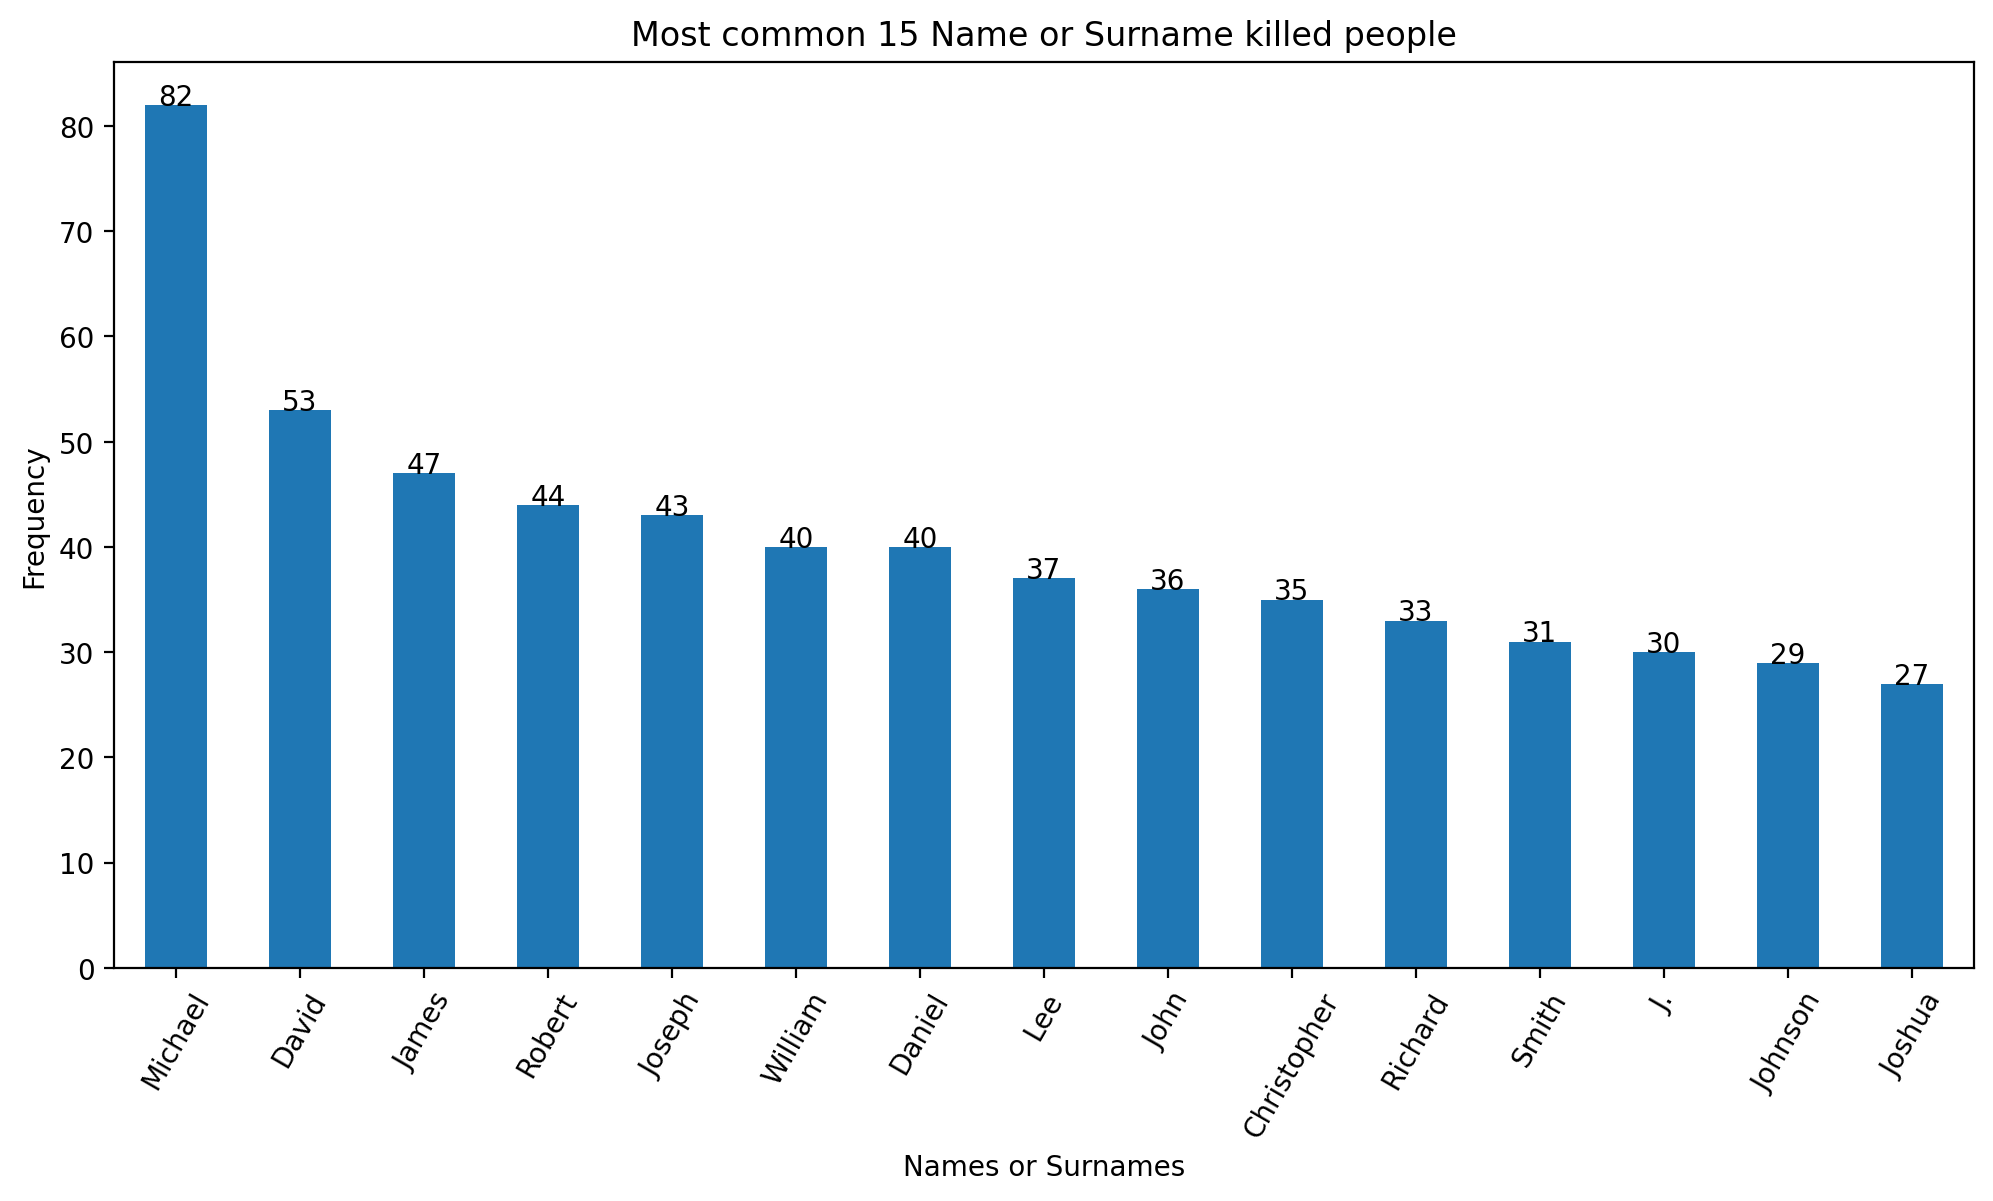

In [169]:
# with pandas
plt.figure(figsize=(12,6), dpi = 200)
common_names.plot.bar();
plt.title("Most common 15 Name or Surname killed people")
plt.xlabel("Names or Surnames")
plt.ylabel("Frequency")
for index, value in enumerate(common_names.values):
    plt.text(index, value, str(value), ha = 'center')
plt.xticks(rotation = 60);

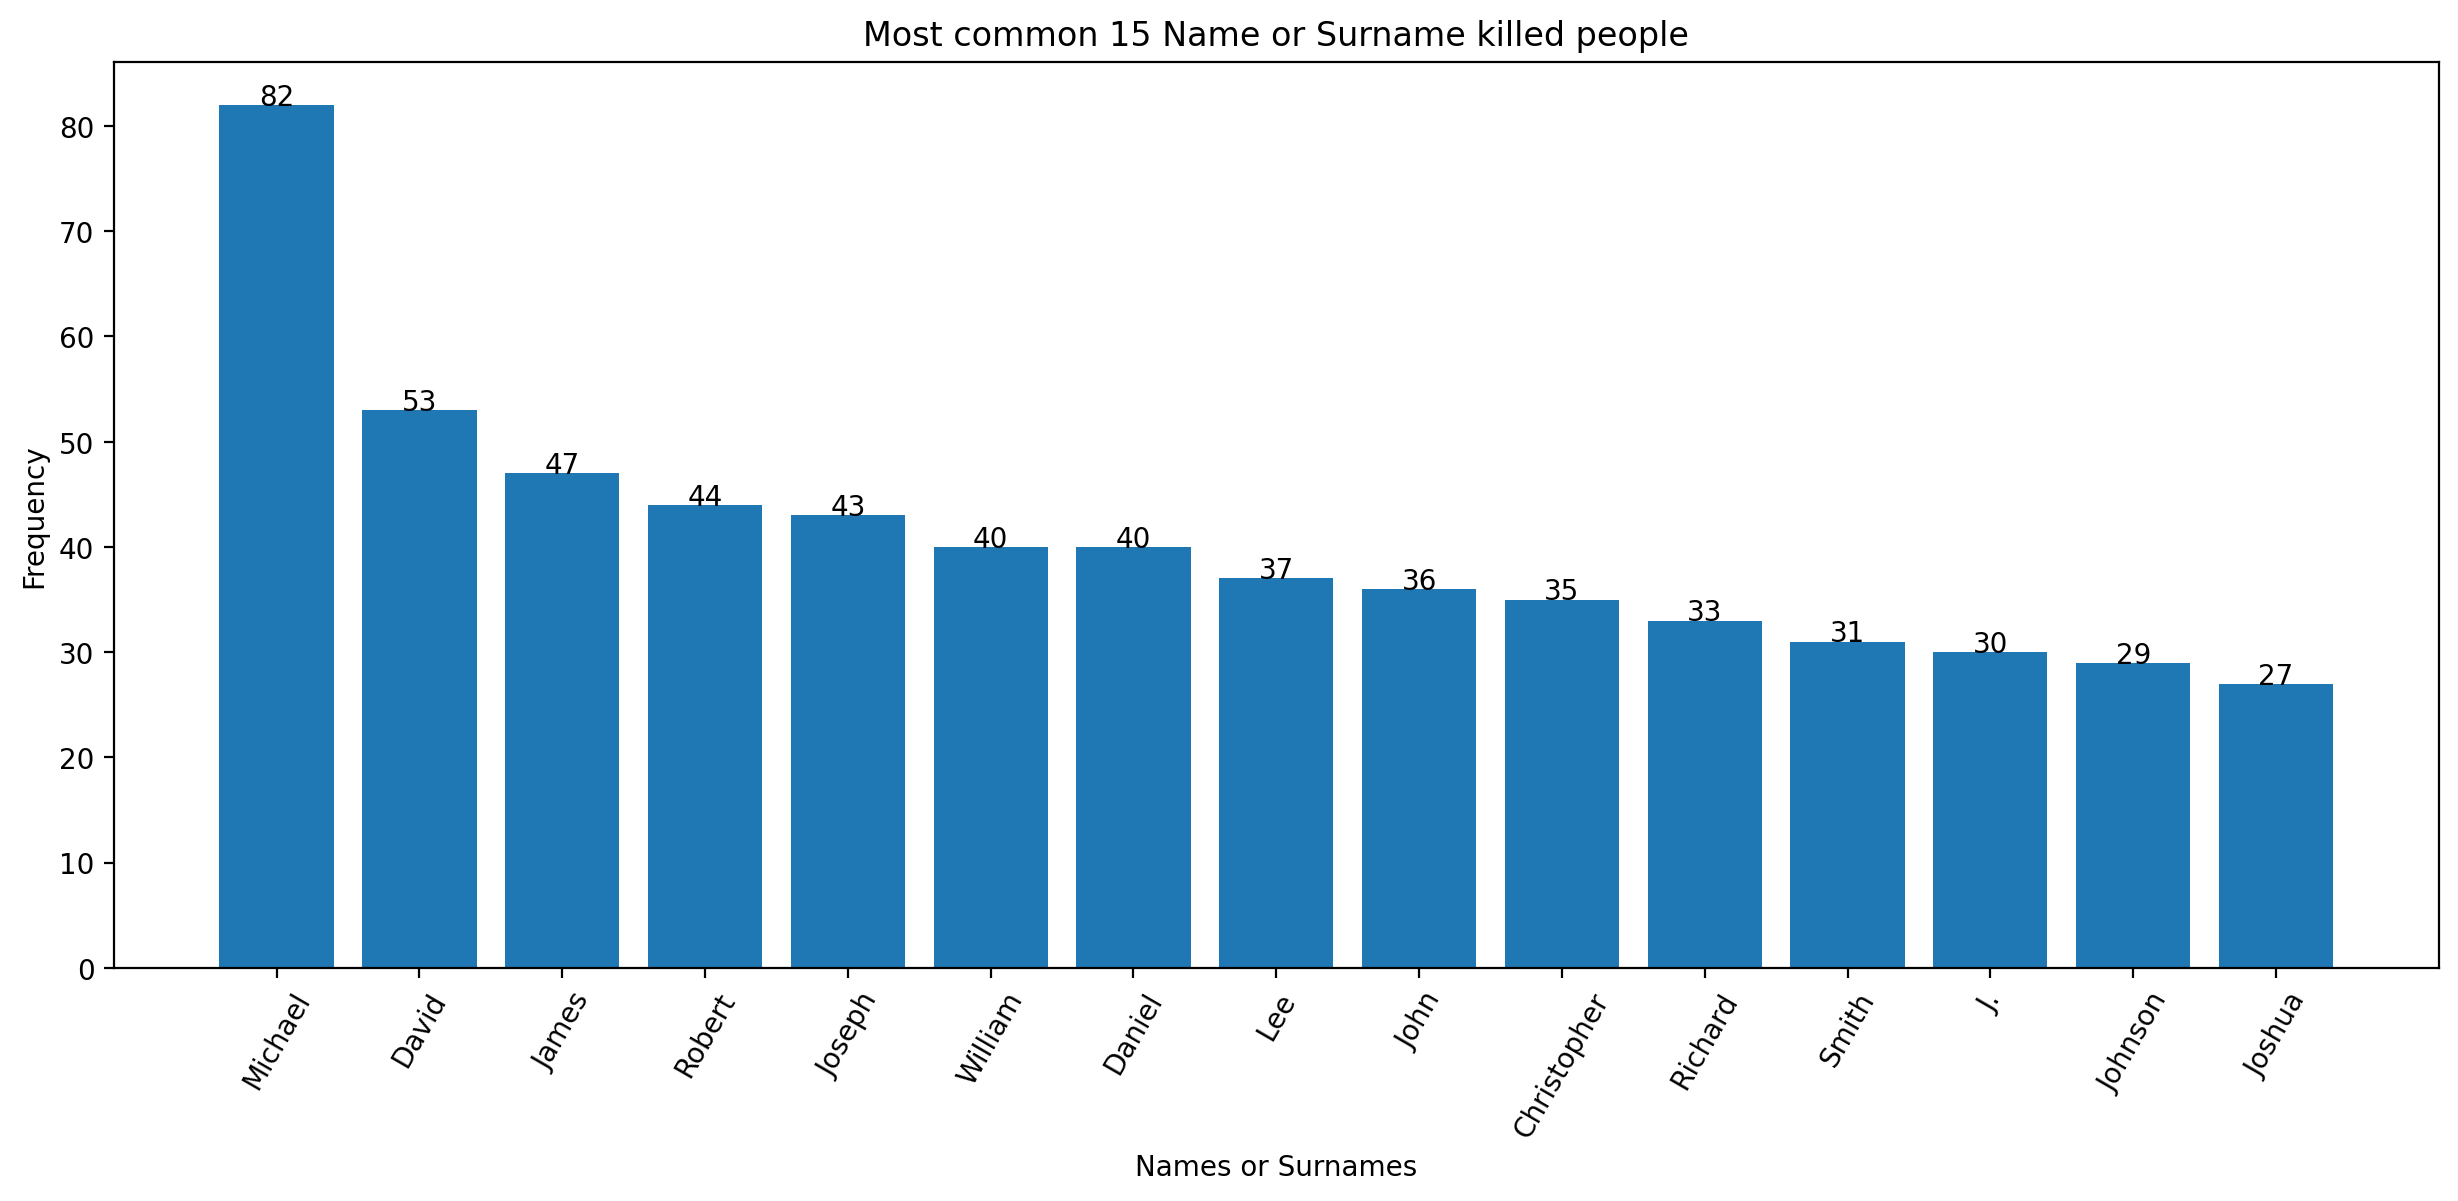

In [172]:
# with matplotlib
plt.figure(figsize=(15,6), dpi=200)
plt.bar(common_names.index, common_names.values);

for index, value in enumerate(common_names.values):
    plt.text(index, value, str(value), ha="center")
plt.xticks(rotation=60)

plt.title("Most common 15 Name or Surname killed people")
plt.xlabel("Names or Surnames")
plt.ylabel("Frequency");